In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import HDFStore

In [4]:
data = HDFStore("../data/model_data_06197001_2012.h5")

In [5]:
data.keys()

['/2012/blocks',
 '/2012/ect',
 '/2012/edges',
 '/2012/graveyard',
 '/2012/hct',
 '/2012/household_targets_acs',
 '/2012/household_validation_acs',
 '/2012/households',
 '/2012/job_county_targets_BEA',
 '/2012/job_flows',
 '/2012/job_targets',
 '/2012/job_validation',
 '/2012/jobs',
 '/2012/metadata',
 '/2012/nodes',
 '/2012/persons',
 '/2012/price_targets',
 '/2012/residential_units',
 '/2012/travel_data',
 '/2012/unit_county_targets_PEP',
 '/2012/unit_targets',
 '/2012/unit_validation',
 '/2012/validation_ect',
 '/2012/validation_hct',
 '/2012/values',
 '/2011/blocks',
 '/2011/ect',
 '/2011/edges',
 '/2011/graveyard',
 '/2011/hct',
 '/2011/household_targets_acs',
 '/2011/household_validation_acs',
 '/2011/households',
 '/2011/job_county_targets_BEA',
 '/2011/job_flows',
 '/2011/job_targets',
 '/2011/job_validation',
 '/2011/jobs',
 '/2011/metadata',
 '/2011/nodes',
 '/2011/persons',
 '/2011/price_targets',
 '/2011/residential_units',
 '/2011/travel_data',
 '/2011/unit_county_targets_

In [23]:
persons_2011_mar = data["/2011/persons"]["MAR"]
persons_2012_mar = data["/2012/persons"]["MAR"]
persons_2013_mar = data["/2013/persons"]["MAR"]
persons_2014_mar = data["/2014/persons"]["MAR"]
persons_2015_mar = data["/2015/persons"]["MAR"]
persons_2016_mar = data["/2016/persons"]["MAR"]
persons_2017_mar = data["/2017/persons"]["MAR"]
persons_2018_mar = data["/2018/persons"]["MAR"]
persons_2019_mar = data["/2019/persons"]["MAR"]
persons_2020_mar = data["/2020/persons"]["MAR"]

In [24]:
persons_2011_mar = pd.DataFrame(persons_2011_mar.value_counts().sort_index())
persons_2012_mar = pd.DataFrame(persons_2012_mar.value_counts().sort_index())
persons_2013_mar = pd.DataFrame(persons_2013_mar.value_counts().sort_index())
persons_2014_mar = pd.DataFrame(persons_2014_mar.value_counts().sort_index())
persons_2015_mar = pd.DataFrame(persons_2015_mar.value_counts().sort_index())
persons_2016_mar = pd.DataFrame(persons_2016_mar.value_counts().sort_index())
persons_2017_mar = pd.DataFrame(persons_2017_mar.value_counts().sort_index())
persons_2018_mar = pd.DataFrame(persons_2018_mar.value_counts().sort_index())
persons_2019_mar = pd.DataFrame(persons_2019_mar.value_counts().sort_index())
persons_2020_mar = pd.DataFrame(persons_2020_mar.value_counts().sort_index())

persons_2011_mar["year"] = 2011
persons_2012_mar["year"] = 2012
persons_2013_mar["year"] = 2013
persons_2014_mar["year"] = 2014
persons_2015_mar["year"] = 2015
persons_2016_mar["year"] = 2016
persons_2017_mar["year"] = 2017
persons_2018_mar["year"] = 2018
persons_2019_mar["year"] = 2019
persons_2020_mar["year"] = 2020

persons_2011_mar = persons_2011_mar.reset_index()
persons_2012_mar = persons_2012_mar.reset_index()
persons_2013_mar = persons_2013_mar.reset_index()
persons_2014_mar = persons_2014_mar.reset_index()
persons_2015_mar = persons_2015_mar.reset_index()
persons_2016_mar = persons_2016_mar.reset_index()
persons_2017_mar = persons_2017_mar.reset_index()
persons_2018_mar = persons_2018_mar.reset_index()
persons_2019_mar = persons_2019_mar.reset_index()
persons_2020_mar = persons_2020_mar.reset_index()

persons_mar = pd.concat([persons_2011_mar, persons_2012_mar, persons_2013_mar,
                         persons_2014_mar, persons_2015_mar, persons_2016_mar,
                         persons_2017_mar, persons_2018_mar, persons_2019_mar,
                         persons_2020_mar])

In [29]:
persons_mar = persons_mar[persons_mar["index"].isin([1,2,3,4,5])].reset_index(drop=True)

In [33]:
persons_mar = persons_mar.rename(columns={"MAR": "count", "index":"MAR"})

In [34]:
persons_mar_obs = pd.read_csv("../outputs/calibration/06197001/marrital_status_over_time_obs.csv")

In [46]:
persons_mar_obs["model"] = "Observed"
persons_mar["model"] = "Simulated"

In [47]:
marital_status = pd.concat([persons_mar, persons_mar_obs]).reset_index(drop=True)

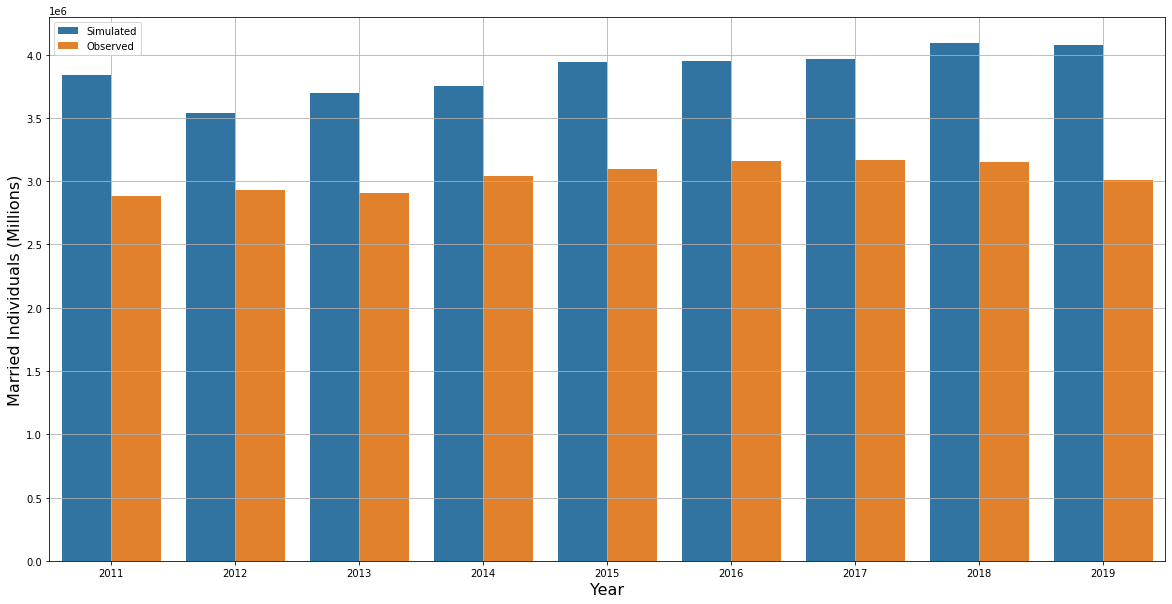

In [48]:
import seaborn as sns
marital_status_1 = marital_status[marital_status["MAR"]==1]
plt.figure(figsize=(20, 10))
sns.barplot(x = "year", y = "count", hue = "model", data = marital_status_1[~marital_status_1["year"].isin([2010, 2020])])
plt.xlabel("Year", size=16)
plt.ylabel("Married Individuals (Millions)", size=16)
# plt.yticks(ticks=np.arange(0, 2.6e6, 0.5e6), labels=np.arange(0, 2.6, 0.5))
plt.legend(title="")
plt.grid()
plt.show()

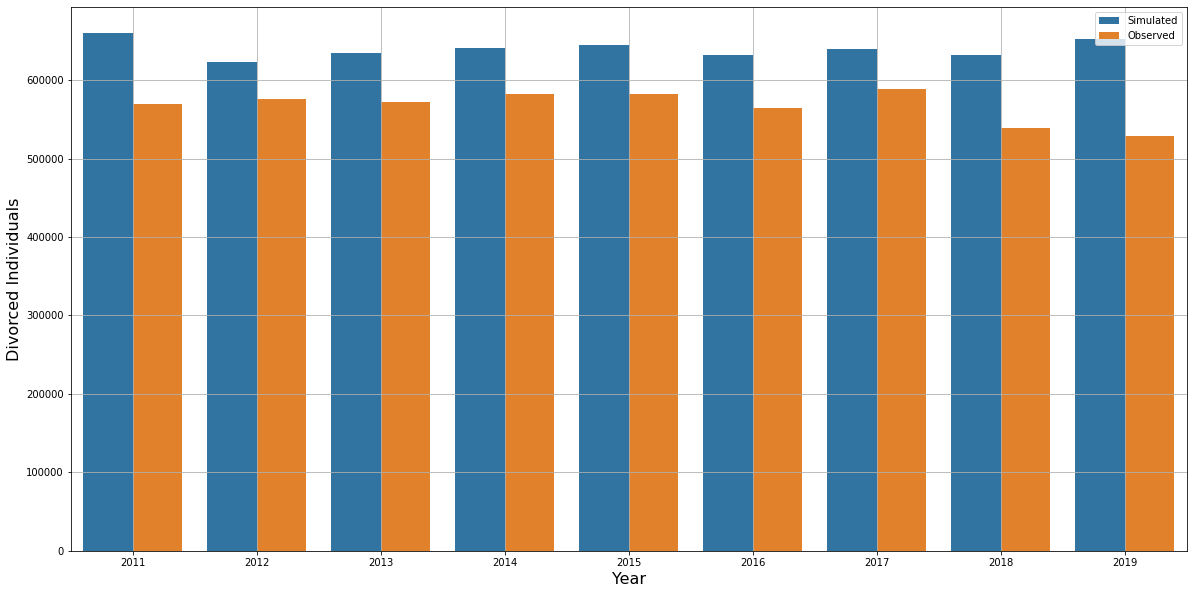

In [49]:
import seaborn as sns
marital_status_3 = marital_status[marital_status["MAR"]==3]
plt.figure(figsize=(20, 10))
sns.barplot(x = "year", y = "count", hue = "model", data = marital_status_3[~marital_status_3["year"].isin([2010, 2020])])
plt.xlabel("Year", size=16)
plt.ylabel("Divorced Individuals", size=16)
# plt.yticks(ticks=np.arange(0, 2.6e6, 0.5e6), labels=np.arange(0, 2.6, 0.5))
plt.legend(title="")
plt.grid()
plt.show()

In [ ]:
import seaborn as sns
marital_status_3 = marital_status[marital_status["MAR"]==3]
plt.figure(figsize=(20, 10))
sns.barplot(x = "year", y = "count", hue = "model", data = marital_status_3[~marital_status_3["year"].isin([2010, 2020])])
plt.xlabel("Year", size=16)
plt.ylabel("Divorced Individuals", size=16)
# plt.yticks(ticks=np.arange(0, 2.6e6, 0.5e6), labels=np.arange(0, 2.6, 0.5))
plt.legend(title="")
plt.grid()
plt.show()

In [136]:
hh_sizes_2011 = pd.read_csv("stats/hh_sizes_2011.csv")
hh_sizes_2012 = pd.read_csv("stats/hh_sizes_2012.csv")
hh_sizes_2013 = pd.read_csv("stats/hh_sizes_2013.csv")
hh_sizes_2014 = pd.read_csv("stats/hh_sizes_2014.csv")
hh_sizes_2015 = pd.read_csv("stats/hh_sizes_2015.csv")
hh_sizes_2016 = pd.read_csv("stats/hh_sizes_2016.csv")
hh_sizes_2017 = pd.read_csv("stats/hh_sizes_2017.csv")
hh_sizes_2018 = pd.read_csv("stats/hh_sizes_2018.csv")
hh_sizes_2019 = pd.read_csv("stats/hh_sizes_2019.csv")
hh_sizes_2020 = pd.read_csv("stats/hh_sizes_2020.csv")

In [137]:
hh_sizes = [hh_sizes_2011,
hh_sizes_2012,
hh_sizes_2013,
hh_sizes_2014,
hh_sizes_2015,
hh_sizes_2016,
hh_sizes_2017,
hh_sizes_2018,
hh_sizes_2019,
hh_sizes_2020]

In [138]:
def reformat(x, year):
    x = x.rename(columns={"Unnamed: 0": "hh_size", "0": "count"})
    x["hh_size"] = "hh_size_" + x["hh_size"].astype(str)
    x["year"] = year
    return x

In [139]:
hh_sizes_2011 = reformat(hh_sizes_2011, 2011)
hh_sizes_2012 = reformat(hh_sizes_2012, 2012)
hh_sizes_2013 = reformat(hh_sizes_2013, 2013)
hh_sizes_2014 = reformat(hh_sizes_2014, 2014)
hh_sizes_2015 = reformat(hh_sizes_2015, 2015)
hh_sizes_2016 = reformat(hh_sizes_2016, 2016)
hh_sizes_2017 = reformat(hh_sizes_2017, 2017)
hh_sizes_2018 = reformat(hh_sizes_2018, 2018)
hh_sizes_2019 = reformat(hh_sizes_2019, 2019)
hh_sizes_2020 = reformat(hh_sizes_2020, 2020)

In [140]:
hh_sizes = pd.concat([hh_sizes_2011,
hh_sizes_2012,
hh_sizes_2013,
hh_sizes_2014,
hh_sizes_2015,
hh_sizes_2016,
hh_sizes_2017,
hh_sizes_2018,
hh_sizes_2019,
hh_sizes_2020])

In [141]:
hh_sizes = hh_sizes.pivot(index="year", columns="hh_size", values="count").reset_index()

In [8]:
sizes = ['hh_size_10', 'hh_size_11', 'hh_size_12',
       'hh_size_13', 'hh_size_14', 'hh_size_15', 'hh_size_16', 'hh_size_17',
       'hh_size_18', 'hh_size_19', 'hh_size_20', 'hh_size_21','hh_size_6', 'hh_size_7',
       'hh_size_8', 'hh_size_9']

In [80]:
hh_sizes

hh_size,year,hh_size_1,hh_size_10,hh_size_11,hh_size_12,hh_size_13,hh_size_14,hh_size_15,hh_size_16,hh_size_17,...,hh_size_2,hh_size_20,hh_size_21,hh_size_3,hh_size_4,hh_size_5,hh_size_6,hh_size_7,hh_size_8,hh_size_9
0,2011,848678.0,2967.0,1379.0,842.0,409.0,204.0,68.0,25.0,17.0,...,804026.0,8.0,NaN,407561.0,328560.0,144010.0,56118.0,20799.0,9503.0,5352.0
1,2012,971396.0,2394.0,1101.0,633.0,332.0,163.0,54.0,26.0,16.0,...,797847.0,4.0,1.0,388666.0,289763.0,127390.0,49092.0,18152.0,7961.0,4604.0
2,2013,1069988.0,2018.0,961.0,507.0,282.0,144.0,53.0,24.0,22.0,...,794521.0,3.0,1.0,369287.0,261287.0,115787.0,44333.0,16752.0,7165.0,3965.0
3,2014,1154332.0,1816.0,836.0,462.0,251.0,116.0,48.0,29.0,22.0,...,794701.0,1.0,NaN,351634.0,239583.0,106755.0,41167.0,15678.0,6816.0,3563.0
4,2015,1226007.0,1652.0,724.0,416.0,224.0,119.0,42.0,33.0,26.0,...,793521.0,1.0,NaN,336153.0,221962.0,99190.0,38919.0,14940.0,6455.0,3312.0
5,2016,1292103.0,1520.0,657.0,384.0,208.0,111.0,42.0,32.0,26.0,...,795254.0,NaN,NaN,321475.0,207058.0,93170.0,37000.0,14471.0,6121.0,3124.0
6,2017,1353008.0,1406.0,623.0,362.0,184.0,102.0,46.0,37.0,23.0,...,796609.0,1.0,NaN,308686.0,193630.0,87384.0,35260.0,14057.0,5888.0,2955.0
7,2018,1413706.0,1348.0,603.0,334.0,164.0,93.0,42.0,39.0,21.0,...,800602.0,NaN,NaN,297527.0,181451.0,82678.0,33499.0,13594.0,5780.0,2773.0
8,2019,1458909.0,1256.0,564.0,289.0,163.0,88.0,49.0,33.0,23.0,...,797592.0,NaN,NaN,285096.0,168785.0,77003.0,32019.0,12829.0,5541.0,2687.0
9,2020,1502809.0,1158.0,479.0,287.0,136.0,93.0,47.0,31.0,18.0,...,795432.0,NaN,NaN,272815.0,157461.0,71563.0,30135.0,12340.0,5352.0,2558.0


In [46]:
hh_sizes["hh_size_6p"] = hh_sizes[sizes].sum(axis=1)

In [47]:
hh_sizes = hh_sizes.drop(columns=sizes)

In [81]:
hh_sizes["sum"] = hh_sizes.sum(axis=1)

In [142]:
sizes_columns = ['hh_size_1', 'hh_size_10', 'hh_size_11', 'hh_size_12',
       'hh_size_13', 'hh_size_14', 'hh_size_15', 'hh_size_16', 'hh_size_17',
       'hh_size_18', 'hh_size_19', 'hh_size_2', 'hh_size_20', 'hh_size_21',
       'hh_size_3', 'hh_size_4', 'hh_size_5', 'hh_size_6', 'hh_size_7',
       'hh_size_8', 'hh_size_9']

In [50]:
hh_sizes["sum"] = hh_sizes["hh_size_1"] + hh_sizes["hh_size_2"] + hh_sizes["hh_size_3"] + hh_sizes["hh_size_4"] + hh_sizes["hh_size_5"] + hh_sizes["hh_size_6p"]
# hh_sizes["hh_size_1"]   = hh_sizes["hh_size_1"]  / hh_sizes["sum"]
# hh_sizes["hh_size_2"]   = hh_sizes["hh_size_2"]  / hh_sizes["sum"]
# hh_sizes["hh_size_3"]   = hh_sizes["hh_size_3"]  / hh_sizes["sum"]
# hh_sizes["hh_size_4"]   = hh_sizes["hh_size_4"]  / hh_sizes["sum"]
# hh_sizes["hh_size_5"]   = hh_sizes["hh_size_5"]  / hh_sizes["sum"]
# hh_sizes["hh_size_6p"] = hh_sizes["hh_size_6p"]/ hh_sizes["sum"]

In [146]:
hh_sizes = hh_sizes.drop(columns=sizes_columns)

In [145]:
hh_sizes["count"] = hh_sizes[sizes_columns].sum(axis=1)

In [4]:
import matplotlib.pyplot as plt

NameError: name 'plt' is not defined

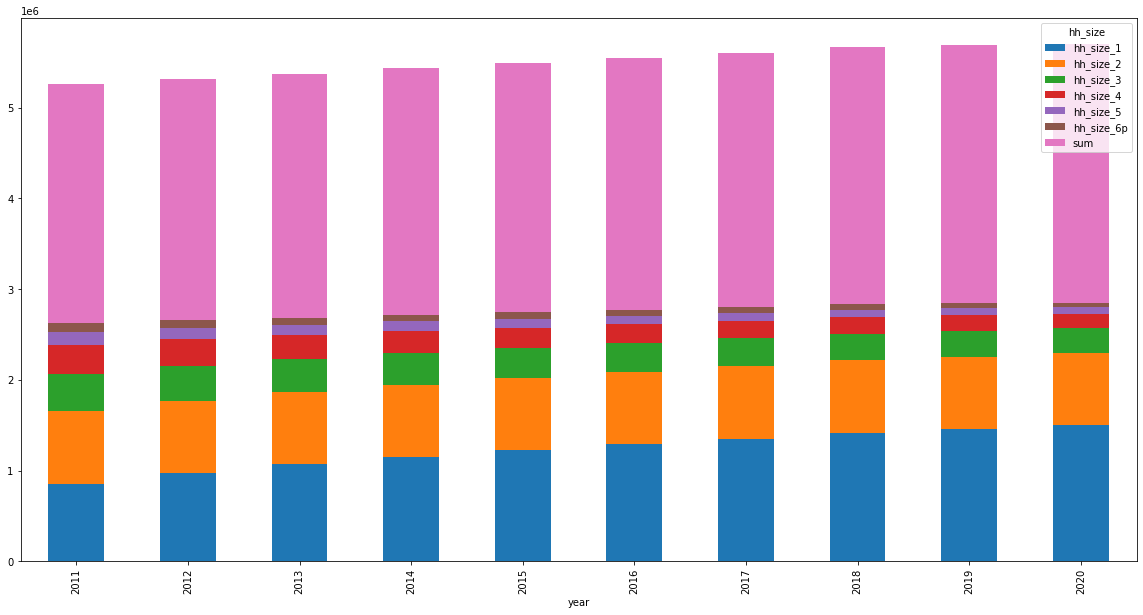

In [ ]:
hh_sizes.plot(x = "year", kind='bar', stacked='true', figsize=(20, 10))
plt.xlabel("Year", size=14)
plt.xticks(rotation=0)
plt.ylabel("Share of Households (%)", size=14)
plt.legend(["HH Size 1", "HH Size 2", "HH Size 3", "HH Size 4", "HH Size 5", "HH Size 6+"], title="Household Size")

In [ ]:
# Population Size

In [52]:
pop_size_base = pd.read_csv("../outputs/calibration/06197001/pop_over_time_obs.csv")
pop_size_c = pd.read_csv("../outputs/simulation/06197001/pop_size_over_time_06197001.csv")
# pop_size_u = pd.read_csv("notebooks/pop_size_over_time.csv")

In [53]:
pop_size_c["model"] = "Simulated"
# pop_size_u["model"] = "Uncalibrated"
pop_size_base["model"] = "Observed"

In [54]:
pop_size = pd.concat([pop_size_c, pop_size_base])

In [55]:
pop_size

,year,count,model
0,2011,6838487,Simulated
1,2012,7452437,Simulated
2,2013,6958767,Simulated
3,2014,7186668,Simulated
4,2015,7186512,Simulated
5,2016,7487653,Simulated
6,2017,7406123,Simulated
7,2018,7366661,Simulated
8,2019,7469075,Simulated
9,2020,7409828,Simulated


In [8]:
pop_size = pd.melt(pop_size, id_vars=['model'], value_vars=['count_2010', 'count_2011', 'count_2012', 'count_2013', 'count_2014', 'count_2015', 'count_2016',
                                       'count_2017', 'count_2018', 'count_2019', 'count_2020'])

In [9]:
pop_size

,year,count,model
0,2011,6844462,Simulation
1,2012,6937955,Simulation
2,2013,6952836,Simulation
3,2014,7077893,Simulation
4,2015,7153379,Simulation
5,2016,7320442,Simulation
6,2017,7388059,Simulation
7,2018,7351007,Simulation
8,2019,7400809,Simulation
9,2020,7379651,Simulation


In [12]:
# pop_size_u = pop_size_u.rename(columns={"count": "value"})
pop_size["year"] = pop_size["variable"].str[-4:].astype(int)

In [68]:
pop_size = pd.concat([pop_size, pop_size_u]).reset_index(drop=True)

In [13]:
pop_size["value"] = pop_size["value"].fillna(0).astype(int)

In [70]:
import numpy as np
import matplotlib.pylab as pl
import matplotlib.ticker as tick

def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return '{:d} M'.format(val)
    elif tick_val > 1000:
        val = int(tick_val) / 1000
        return '{:d} k'.format(val)
    else:
        return tick_val

In [56]:
pop_size = pop_size.sort_values(by=["model", "year"], ascending=[True, True]).reset_index(drop=True)

In [57]:
pop_size

,year,count,model
0,2010,7169297,Observed
1,2011,7243090,Observed
2,2012,7344695,Observed
3,2013,7438456,Observed
4,2014,7561755,Observed
5,2015,7654870,Observed
6,2016,7684011,Observed
7,2017,7756158,Observed
8,2018,7753023,Observed
9,2019,7739378,Observed


In [12]:
import numpy as np

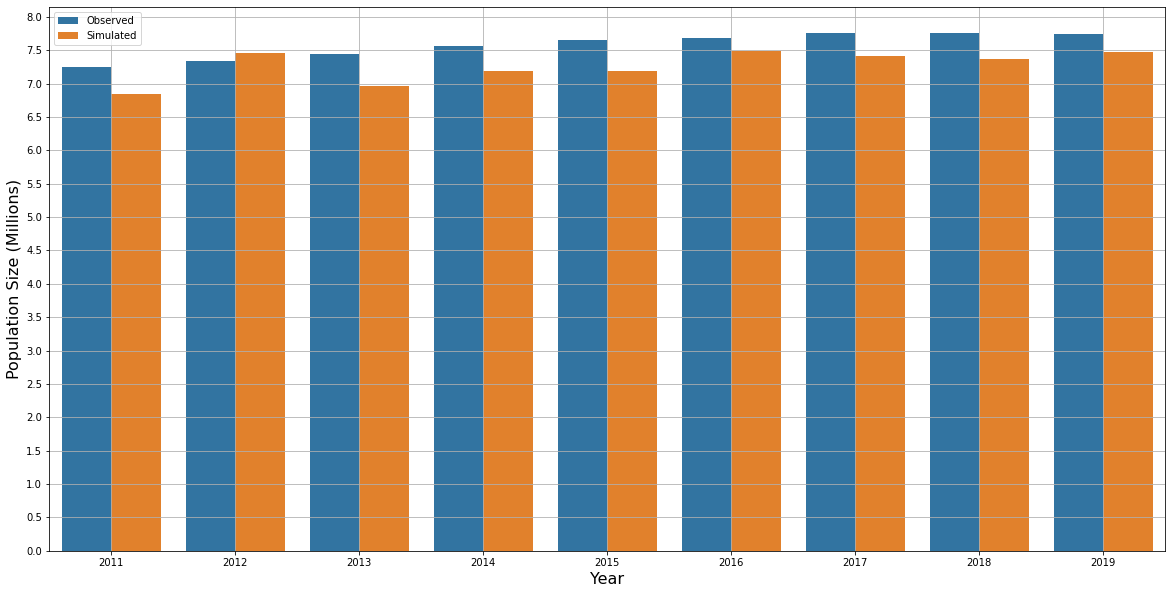

In [61]:
import seaborn as sns
import numpy as np
plt.figure(figsize=(20, 10))
sns.barplot(x = "year", y = "count", hue = "model", data = pop_size[~pop_size["year"].isin([2010, 2020])])
plt.xlabel("Year", size=16)
plt.ylabel("Population Size (Millions)", size=16)
plt.yticks(ticks=np.arange(0, 8.1e6, 0.5e6), labels=np.arange(0, 8.1, 0.5))
plt.legend(title="")
plt.grid()
plt.show()

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.barplot(x = "year", y = "value", hue = "model", data = pop_size[~pop_size["year"].isin([2010, 2020])])
plt.xlabel("Year", size=16)
plt.ylabel("Population Size (Millions)", size=16)
plt.yticks(ticks=np.arange(0, 10.6e6, 0.5e6), labels=np.arange(0, 10.6, 0.5))
plt.legend(title="")
plt.grid()
plt.show()

In [28]:
hh_sizes["model"] = "Calibrated"

In [147]:
hh_sizes_u = pd.read_csv("notebooks/hh_size_over_time.csv")

In [62]:
hh_size_b = pd.read_csv("../outputs/calibration/06197001/households_over_time_obs.csv")
hh_size_c = pd.read_csv("../outputs/simulation/06197001/hh_size_over_time_06197001.csv")

In [63]:
hh_size_b

,year,count
0,2010,2576408
1,2011,2599927
2,2012,2624349
3,2013,2653037
4,2014,2674697
5,2015,2709476
6,2016,2713705
7,2017,2715977
8,2018,2731126
9,2019,2754402


In [64]:
hh_size_b["model"] = "Observed"
hh_size_c["model"] = "Simulated"

In [149]:
# hh_sizes_u["year"] = hh_sizes_u["variable"].str[-4:].astype(int)
hh_sizes_u["model"] = "Uncalibrated"

In [150]:
hh_sizes = hh_sizes.rename(columns={"sum": "count"})
hh_sizes_u = hh_sizes_u.rename(columns={"value": "count"})

In [92]:
hh_sizes_base = pd.read_csv("stats/hh_sizes_over_time_base.csv")

In [155]:
hh_sizes["model"] = "Calibrated"

In [154]:
hh_sizes_u

,year,count,model
0,2010,2605386,Uncalibrated
1,2011,2888760,Uncalibrated
2,2012,3261862,Uncalibrated
3,2013,3711219,Uncalibrated
4,2014,4244584,Uncalibrated
5,2015,4871436,Uncalibrated
6,2016,5596108,Uncalibrated
7,2017,6417584,Uncalibrated
8,2018,7347871,Uncalibrated
9,2019,8410551,Uncalibrated


In [153]:
hh_sizes_base

,variable,count,year,model
0,count_2010,2576408,2010,Observed
1,count_2011,2599927,2011,Observed
2,count_2012,2624349,2012,Observed
3,count_2013,2653037,2013,Observed
4,count_2014,2674697,2014,Observed
5,count_2015,2709476,2015,Observed
6,count_2016,2713705,2016,Observed
7,count_2017,2715977,2017,Observed
8,count_2018,2731126,2018,Observed
9,count_2019,2754402,2019,Observed


In [94]:
hh_sizes_base = pd.melt(hh_sizes_base, value_vars=['count_2010', 'count_2011', 'count_2012', 'count_2013', 'count_2014', 'count_2015', 'count_2016',
                                       'count_2017', 'count_2018', 'count_2019'])

In [95]:
hh_sizes_base["year"] = hh_sizes_base["variable"].str[-4:].astype(int)
hh_sizes_base["model"] = "Observed"
hh_sizes_base = hh_sizes_base.rename(columns={"value": "count"})

In [94]:
# hh_size_nou = pd.concat([hh_sizes, hh_sizes_base, hh_sizes_u])
hh_size_nou = pd.concat([hh_sizes, hh_sizes_base])

In [65]:
hh_size = pd.concat([hh_size_c, hh_size_b])

In [66]:
hh_size

,year,count,model
0,2011,2733125,Simulated
1,2012,2953247,Simulated
2,2013,2746146,Simulated
3,2014,2810332,Simulated
4,2015,2821595,Simulated
5,2016,2893171,Simulated
6,2017,2866172,Simulated
7,2018,2891285,Simulated
8,2019,2914926,Simulated
9,2020,2946495,Simulated


In [67]:
hh_size = hh_size.sort_values(by=["model", "year"], ascending=[True, True]).reset_index(drop=True)

In [164]:
hh_size_c = hh_size[hh_size["model"]!="Uncalibrated"]

In [68]:
import numpy as np

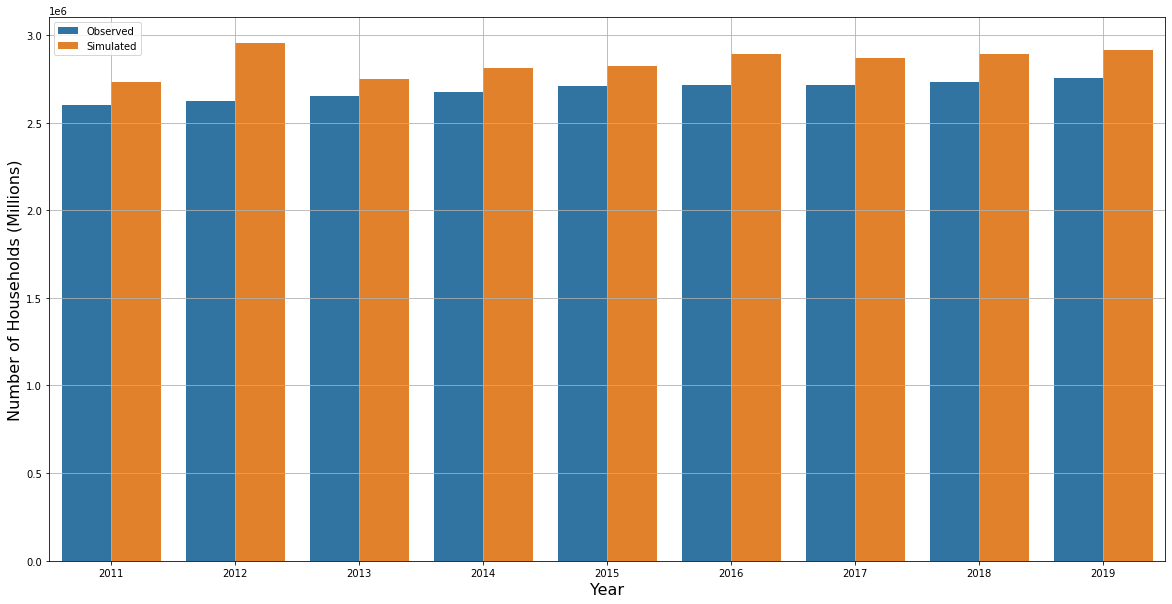

In [69]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.barplot(x = "year", y = "count", hue = "model", data = hh_size[~hh_size["year"].isin([2010, 2020])])
plt.xlabel("Year", size=16)
plt.ylabel("Number of Households (Millions)", size=16)
# plt.yticks(ticks=np.arange(0, 1.1e6, 0.5e6), labels=np.arange(0, 1.1, 0.5))
plt.legend(title="")
plt.grid()
plt.show()

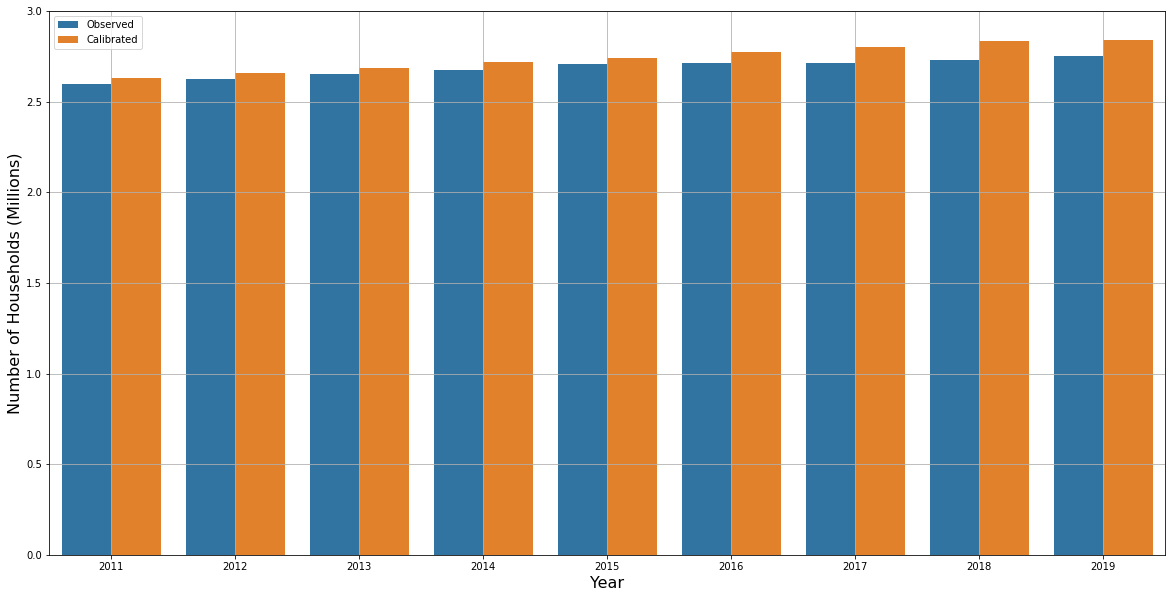

In [166]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.barplot(x = "year", y = "count", hue = "model", data = hh_size_c[~hh_size_c["year"].isin([2010, 2020])])
plt.xlabel("Year", size=16)
plt.ylabel("Number of Households (Millions)", size=16)
plt.yticks(ticks=np.arange(0, 3.1e6, 0.5e6), labels=np.arange(0, 3.1, 0.5))
plt.legend(title="")
plt.grid()
plt.show()

In [71]:
mortalities_obs = pd.read_csv("../outputs/calibration/06197001/mortalities_over_time_obs.csv")
mortalities_c = pd.read_csv("../outputs/simulation/06197001/mortalities_06197001.csv")
# mortalities_u = pd.read_csv("notebooks/mortalities.csv")

In [72]:
mortalities_c["model"] = "Simulated"
mortalities_obs["model"] = "Observed"
# mortalities_u["model"] = "Uncalibrated"

In [21]:
mortalities_obs

,year,fatalities,model
0,2010,44675,Observed
1,2011,45247,Observed
2,2012,46164,Observed
3,2013,46578,Observed
4,2014,46385,Observed
5,2015,48665,Observed
6,2016,48830,Observed
7,2017,49996,Observed
8,2018,49258,Observed
9,2019,49588,Observed


In [22]:
mortalities_c

,Unnamed: 0,year,fatalities,model
0,0,2011,52229,Calibrated
1,1,2012,50392,Calibrated
2,2,2013,49166,Calibrated
3,3,2014,48352,Calibrated
4,4,2015,48185,Calibrated
5,5,2016,48051,Calibrated
6,6,2017,47844,Calibrated
7,7,2018,47901,Calibrated
8,8,2019,48270,Calibrated
9,9,2020,48431,Calibrated


In [23]:
mortalities_c["year"] = mortalities_c.index.to_numpy() + 2010

In [73]:
mortalities = pd.concat([mortalities_c, mortalities_obs]).reset_index(drop=True)

In [74]:
mortalities = mortalities.sort_values(by=["model", "year"], ascending=[True, True]).reset_index(drop=True)

In [11]:
mortalities

,year,fatalities,model,count
0,2010,NaN,Observed,8510.0
1,2011,NaN,Observed,8667.0
2,2012,NaN,Observed,9337.0
3,2013,NaN,Observed,9418.0
4,2014,NaN,Observed,9877.0
5,2015,NaN,Observed,10520.0
6,2016,NaN,Observed,10849.0
7,2017,NaN,Observed,11145.0
8,2018,NaN,Observed,11830.0
9,2019,NaN,Observed,11816.0


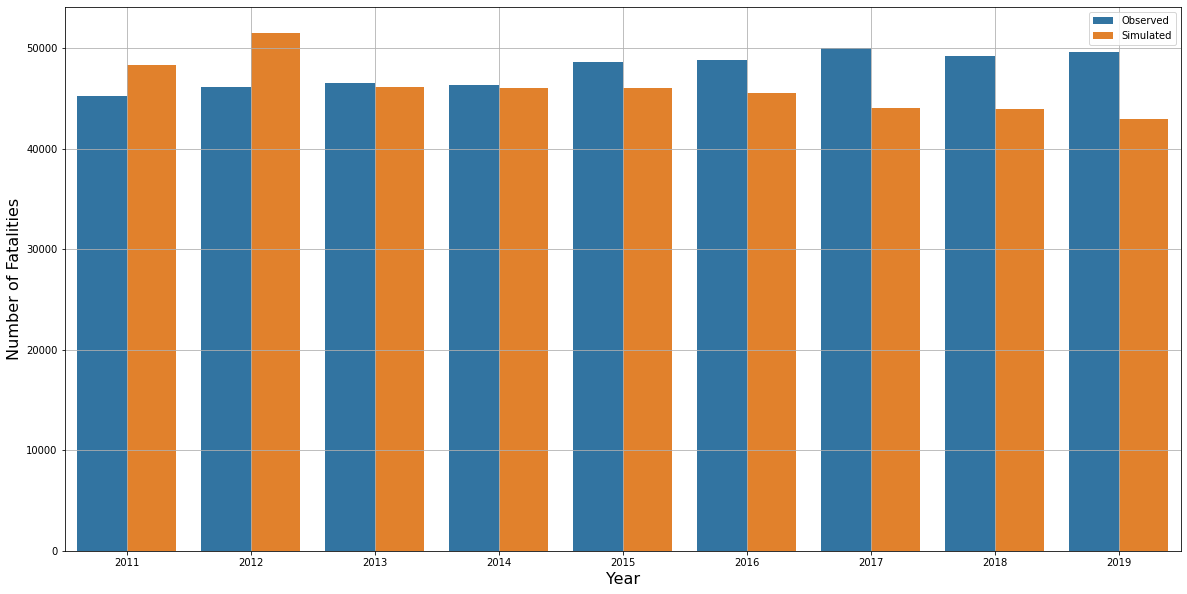

In [75]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.barplot(x = "year", y = "count", hue = "model", data = mortalities[~mortalities["year"].isin([2010, 2020])])
plt.xlabel("Year", size=16)
plt.ylabel("Number of Fatalities", size=16)
plt.legend(title="")
plt.grid()
plt.show()

In [76]:
births_obs = pd.read_csv("../outputs/calibration/06197001/births_over_time_obs.csv")
births_c = pd.read_csv("../outputs/simulation/06197001/btable_06197001.csv")
# births_u = pd.read_csv("notebooks/btable.csv")

In [34]:
births_obs

,year,births
0,2010,87914
1,2011,86836
2,2012,88113
3,2013,86327
4,2014,88383
5,2015,87338
6,2016,86874
7,2017,84062
8,2018,81378
9,2019,80564


In [77]:
births_c["model"] = "Simulated"
births_obs["model"] = "Observed"
# births_u["model"] = "Uncalibrated"

In [78]:
births = pd.concat([births_c, births_obs]).reset_index(drop=True)

In [79]:
births = births.sort_values(by=["model", "year"], ascending=[True, True]).reset_index(drop=True)

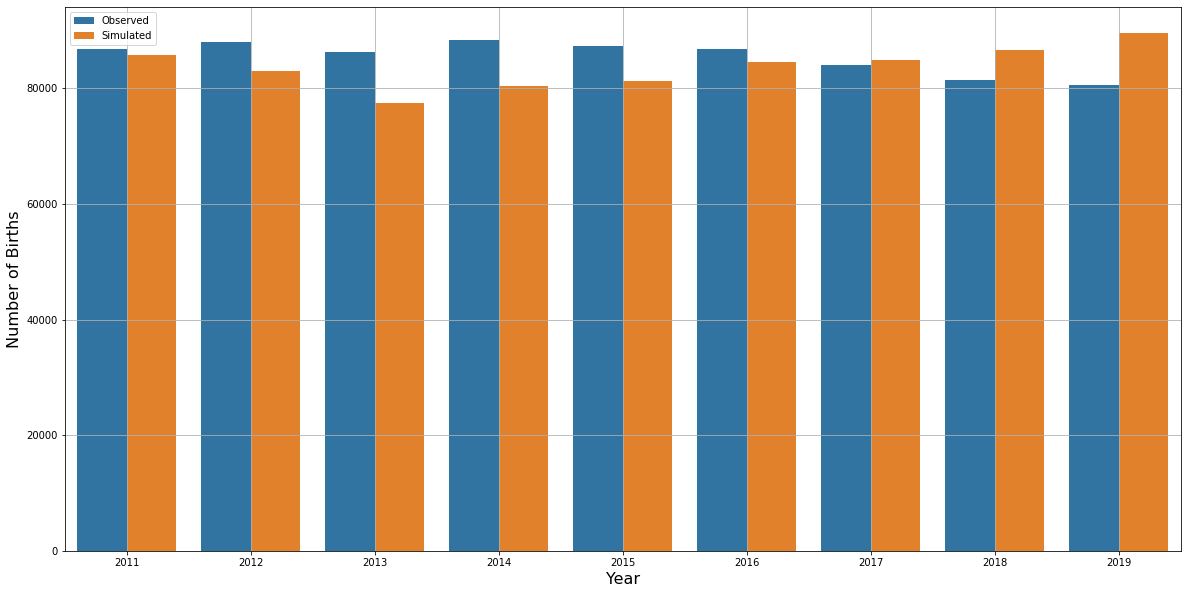

In [80]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.barplot(x = "year", y = "count", hue = "model", data = births[~births["year"].isin([2010, 2020])])
plt.xlabel("Year", size=16)
plt.ylabel("Number of Births", size=16)
plt.legend(title="")
plt.grid()
plt.show()

In [70]:
hh_sizes_2011 = data["2011/persons"]
hh_sizes_2012 = data["2012/persons"]
hh_sizes_2013 = data["2013/persons"]
hh_sizes_2014 = data["2014/persons"]
hh_sizes_2015 = data["2015/persons"]
hh_sizes_2016 = data["2016/persons"]
hh_sizes_2017 = data["2017/persons"]
hh_sizes_2018 = data["2018/persons"]
hh_sizes_2019 = data["2019/persons"]
hh_sizes_2020 = data["2020/persons"]

KeyboardInterrupt: 

In [43]:
hh_sizes_2010["student"].sum()
hh_sizes_2010["student"].sum()
hh_sizes_2010["student"].sum()

1218306.0

In [71]:
edu_c = pd.read_csv("edu_06197001.csv")
edu_obs = pd.read_csv("edu_obs.csv")

In [72]:
edu_c["model"] = "Calibrated"
edu_obs["model"] = "Observed"
# births_u["model"] = "Uncalibrated"

In [73]:
edu = pd.concat([edu_c, edu_obs]).reset_index(drop=True)

In [74]:
edu = edu.sort_values(by=["model", "year"], ascending=[False, True]).reset_index(drop=True)

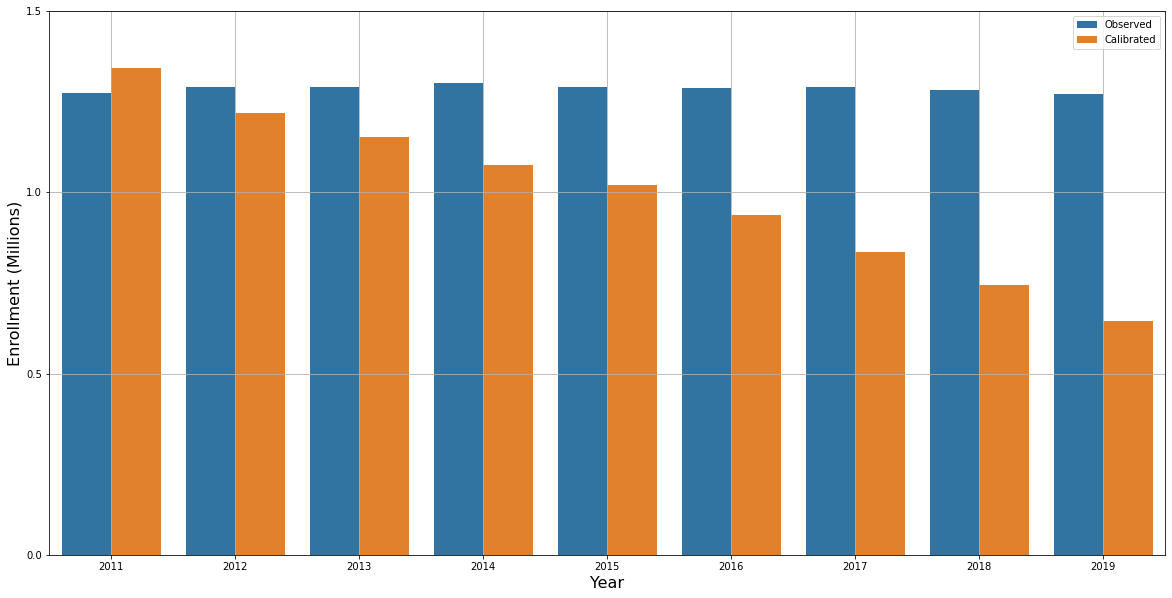

In [76]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.barplot(x = "year", y = "enrollment", hue = "model", data = edu[~edu["year"].isin([2010, 2020])])
plt.xlabel("Year", size=16)
plt.ylabel("Enrollment (Millions)", size=16)
plt.yticks(ticks=np.arange(0, 1.6e6, 0.5e6), labels=np.arange(0, 1.6, 0.5))
plt.legend(title="")
plt.grid()
plt.show()